In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import PatchCollection
import warnings
import tinyarray as ta

Fibonacci_number = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657]

In [22]:
class Pentagrid:
    def __init__(self, gammas, config = {}):
        self.config = {
            "TOL" :  10**(-10),
            "klim":  5,
            "xylim": 3,
        }
        self.config.update(config)
        
        if np.sum(gammas)>self.config["TOL"]:
            warnings.warn("sum of gammas = {}".format(np.sum(gammas)))
        self.gammas = gammas
        
        self.vs = [np.array( [np.cos((2*np.pi/5)*i), np.sin((2*np.pi/5)*i)] ) for i in range(5)]
        print(self.vs)
        self.ks = np.arange(-self.config["klim"], self.config["klim"])
        self.yy = np.linspace(-self.config["xylim"],self.config["xylim"],100)
        # Use these definitions to draw grid lines in the five directions of the pentagon
        
        self.colors = ["C"+str(j) for j in range(5)]
        
        self.find_intersections()
        # Find all points of intersection of gridlines. Every intersection corresponds to a rhombus.
        # Use the draw rhombs function to visualize every rhombus.
        
    def gridline(self,j,k):
        if np.abs(self.vs[j][1])<self.config["TOL"]:
            return [0,(k - self.gammas[j])/self.vs[j][0]]
        else:
            return [-self.vs[j][1]/self.vs[j][0],(k-self.gammas[j])/self.vs[j][0]]
        
    def draw_grid(self):
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"],self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"],self.config["xylim"]))
        
        for j in range(5):
            for k in self.ks:
                m,c = self.gridline(j,k)
                ax.plot(m*self.yy + c,self.yy, self.colors[j])
                
    def find_intersections(self):
        self.intersections = {}
        for r in range(4):
            for s in range(r+1,5):
                for kr in self.ks:
                    for ks in self.ks:
                        mr,cr = self.gridline(r,kr)
                        ms,cs = self.gridline(s,ks)
                        y = -(cr-cs)/(mr-ms)
                        self.intersections[(r,s,kr,ks)] = np.array([mr*y + cr,y])
                
    def draw_intersections(self):
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"],self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"],self.config["xylim"]))
        
        ax.scatter([point[0] for point in self.intersections.values()],[point[1] for point in self.intersections.values()])
        
    def xytoK(self, xy):
        K_intermediate = [np.dot(self.vs[j],xy) + self.gammas[j] for j in range(5)]
        for i in range(len(K_intermediate)):
            if K_intermediate[i]%1<self.config["TOL"]:
                K_intermediate[i]=K_intermediate[i]//1
        K = [np.ceil(K_intermediate[j]) for j in range(5)]
        return K
    
    def Ktoxy(self,K):
        xy = np.sum([K[i]*self.vs[i] for i in range(5)], axis = 0)
        return xy
                
    def find_rhomb(self, key):
        K0 = self.xytoK(self.intersections[key])
        r,s,kr,ks = key
        K1, K2, K3 = list(K0), list(K0), list(K0)
        K1[r] = K1[r]+1
        K2[r] = K2[r]+1
        K2[s] = K2[s]+1
        K3[s] = K3[s]+1
        rhomb = [K0,K1,K2,K3]
        return rhomb
    
    def draw_rhombs(self, keys = None):
        if keys == None:
            keys = list(self.intersections.keys())
        
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"],self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"],self.config["xylim"]))

        for key in keys:
            rhomb = self.find_rhomb(key)
            vertices = []
            if (key[0]-key[1])%5==1 or (key[0]-key[1])%5==4:
                color = "C0"
            else:
                color = "C1"
            for K in rhomb:
                x,y = self.Ktoxy(K)
                vertices += [[x,y]]  
            rhomb_patch = pch.Polygon(vertices, True, ec = "k",lw = 3, alpha = 0.5, color = color)
            ax.add_patch(rhomb_patch)
    

[array([1., 0.]), array([0.30901699, 0.95105652]), array([-0.80901699,  0.58778525]), array([-0.80901699, -0.58778525]), array([ 0.30901699, -0.95105652])]


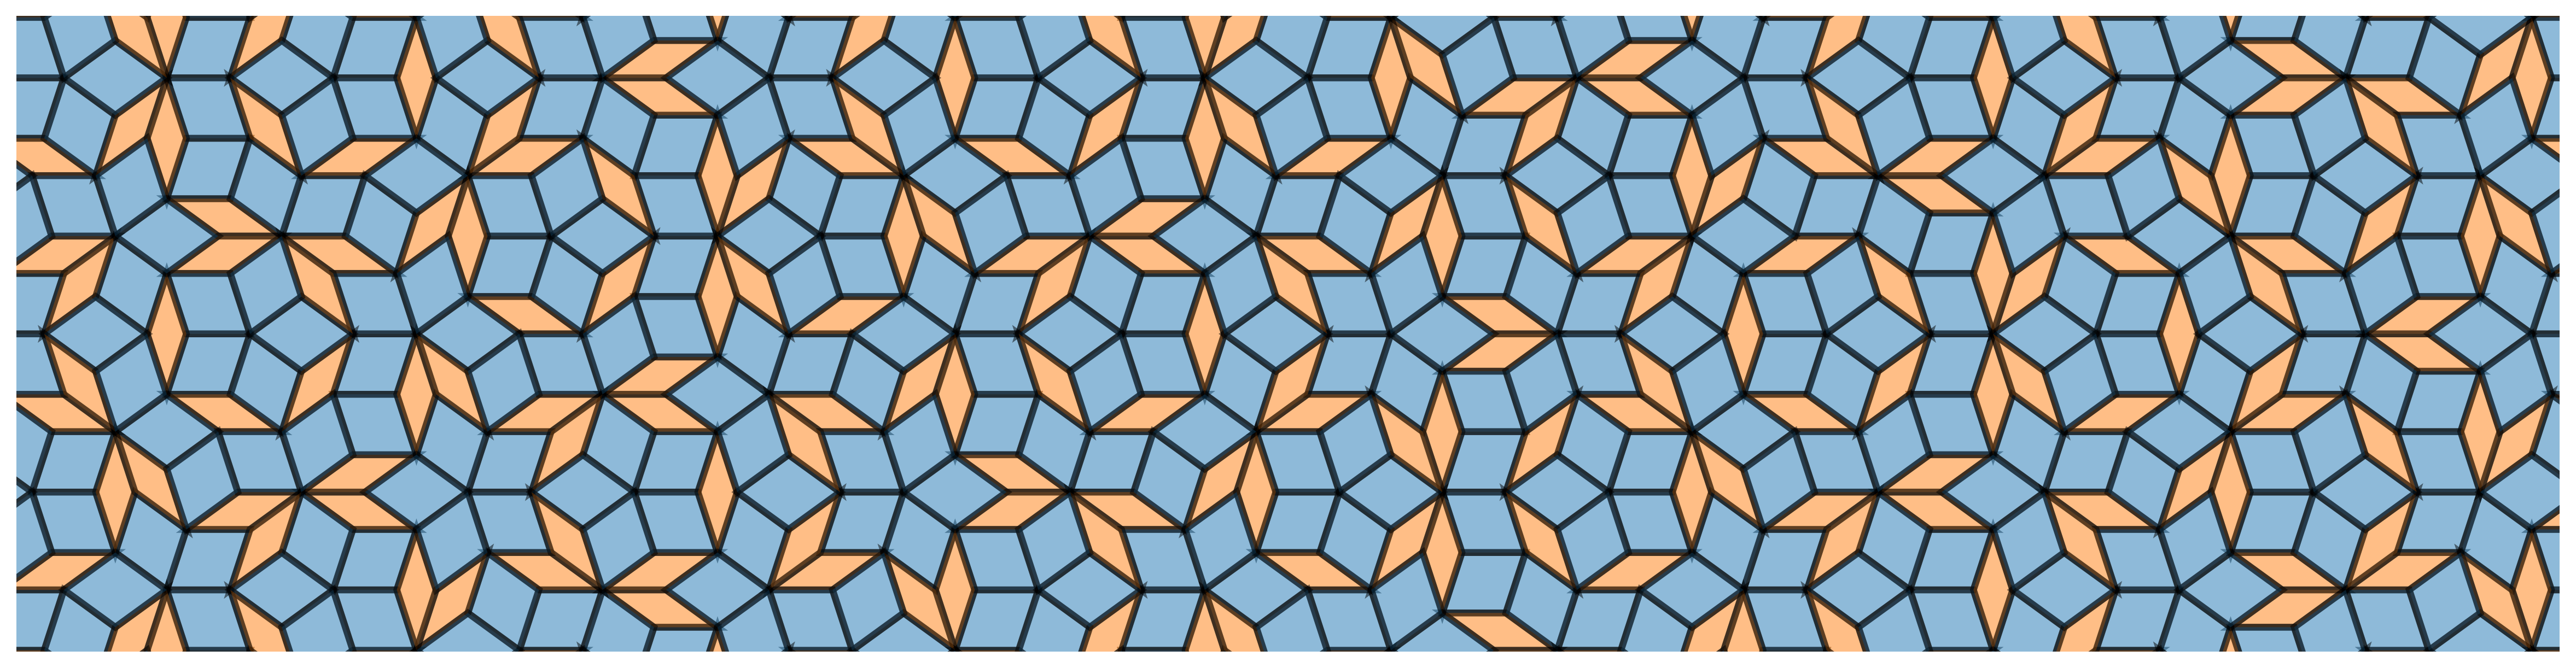

In [35]:
gammas = np.random.rand(4)-0.5
# gammas = np.array([0.05,0.05,0.03,-0.02])
gammas = np.hstack((gammas, -np.sum(gammas) ))
# Sum of gammas must equal zero to return a Penrose tiling. If the sum is not equal to zero one gets a generalized Penrose tiling.

test1 = Pentagrid(gammas, config = {"xylim":5, "klim":9, "TOL":10**(-10)})
# xylim controls the size of the square.
# klim controls the number of grid lines used to generate the tiling, As a rule of thumb klim must be atleast comparable to xylim or else there will be holes in the tiling.
# TOL is tolerance for precision errors when comparing two quantities for equality.

fig, ax = plt.subplots(figsize = (20,9), dpi=300)
ax.set_axis_off()

# test1.draw_grid()
# test1.draw_intersections()
test1.draw_rhombs()
xmax = 5*1584//396
ax.set_xlim(-xmax,xmax)

plt.savefig('../cover.jpg', bbox_inches='tight')

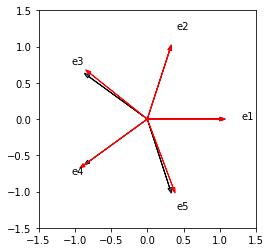

In [6]:
fig, ax = plt.subplots()

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_aspect('equal')

txts = ["e"+str(i) for i in range(1,6)]
vs = [np.array( [np.cos((2*np.pi/5)*i), np.sin((2*np.pi/5)*i)] ) for i in range(5)]

for v, txt in zip(vs, txts):
    ax.annotate(txt, xy = 1.3*v )
    ax.arrow(0,0,v[0],v[1],head_width = 0.05)
    
n = 1
tau_approximate = Fibonacci_number[n+1]/Fibonacci_number[n]
grid_vs =list(vs)
grid_vs[2] = -vs[0] + 1/tau_approximate * vs[1]
grid_vs[3] = - 1/tau_approximate*vs[0] - 1/tau_approximate*vs[1]
grid_vs[4] = 1/tau_approximate*vs[0] - vs[1]

for v in grid_vs:
    ax.arrow(0,0,v[0],v[1], color = "red", head_width = 0.05)
    
# ax.plot([np.cos(t) for t in np.linspace(0,2*np.pi,100)], [np.sin(t) for t in np.linspace(0,2*np.pi,100)])

The $k$th gridline of grid $i$ is defined by all $x$ such that $x \cdot e_i + \gamma_i = k$ where $k$ is an integer

## Approximant

In [7]:
class Pentagrid_approximant:
    def __init__(self, gammas, n, n2 = None, config = {}):
        self.config = {
            "TOL" :  10**(-10),
            "klim":  5,
            "xylim": 3,
            "show unit cell": True
        }
        self.config.update(config)
        self.n = n
        if n2 == None:
            n2 = n
        self.n2 = n2
        self.config["xylim"] = 1.1*Fibonacci_number[np.max([self.n, self.n2])+3]
        
        if np.sum(gammas)>self.config["TOL"]:
            warnings.warn("sum of gammas = {}".format(np.sum(gammas)))
        self.gammas = gammas
        
        self.tiling_vs = [np.array( [np.cos(2*np.pi/5*i), np.sin(2*np.pi/5*i)] ) for i in range(5)]
        
        tau_approximate = Fibonacci_number[self.n+1]/Fibonacci_number[self.n]
        tau_approximate2 = Fibonacci_number[self.n2+1]/Fibonacci_number[self.n2]

        
        self.grid_vs =list(self.tiling_vs)
        self.grid_vs[2] = -self.tiling_vs[0] + 1/tau_approximate * self.tiling_vs[1]
        self.grid_vs[3] = - 1/tau_approximate2*self.tiling_vs[0] - 1/tau_approximate*self.tiling_vs[1]
        self.grid_vs[4] = 1/tau_approximate2*self.tiling_vs[0] - self.tiling_vs[1]
                
        self.ks = np.arange(-self.config["klim"], self.config["klim"])
        self.yy = np.linspace(-self.config["xylim"],self.config["xylim"],100)
        # Use these definitions to draw grid lines in the five directions of the pentagon
        
        self.colors = ["C"+str(j) for j in range(5)]
        
        self.find_intersections()
        # Find all points of intersection of gridlines. Every intersection corresponds to a rhombus.
        # Use the draw rhombs function to visualize every rhombus.
        
    def gridline(self,j,k):
        if np.abs(self.grid_vs[j][1])<self.config["TOL"]:
            return [0,(k - self.gammas[j])/self.grid_vs[j][0]]
        else:
            return [-self.grid_vs[j][1]/self.grid_vs[j][0],(k-self.gammas[j])/self.grid_vs[j][0]]
        
    def draw_grid(self):
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"],self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"],self.config["xylim"]))
        
        for j in range(5):
            for k in self.ks:
                m,c = self.gridline(j,k)
                ax.plot(m*self.yy + c,self.yy, self.colors[j])
                
    def find_intersections(self):
        self.intersections = {}
        for r in range(4):
            for s in range(r+1,5):
                for kr in self.ks:
                    for ks in self.ks:
                        mr,cr = self.gridline(r,kr)
                        ms,cs = self.gridline(s,ks)
                        y = -(cr-cs)/(mr-ms)
                        self.intersections[(r,s,kr,ks)] = np.array([mr*y + cr,y])
                        
                
    def draw_intersections(self):
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"],self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"],self.config["xylim"]))
        
        ax.scatter([point[0] for point in self.intersections.values()],[point[1] for point in self.intersections.values()])
        
    def xytoK(self, xy):
        K_intermediate = [np.dot(self.grid_vs[j],xy) + self.gammas[j] for j in range(5)]
        for i in range(len(K_intermediate)):
            if K_intermediate[i]%1<self.config["TOL"]:
                K_intermediate[i]=K_intermediate[i]//1
        K = [np.ceil(K_intermediate[j]) for j in range(5)]
        return K
    
    def Ktoxy(self,K):
        xy = np.sum([K[i]*self.tiling_vs[i] for i in range(5)], axis = 0)
        return xy
                
    def find_rhomb(self, key):
        K0 = self.xytoK(self.intersections[key])
        r,s,kr,ks = key
        K1, K2, K3 = list(K0), list(K0), list(K0)
        K1[r] = K1[r]+1
        K2[r] = K2[r]+1
        K2[s] = K2[s]+1
        K3[s] = K3[s]+1
        rhomb = [K0,K1,K2,K3]
        return rhomb
    
    def draw_rhombs(self, keys = None):
        if keys == None:
            keys = list(self.intersections.keys())
        
        ax = plt.gca()
        
        ax.set_aspect("equal")
        ax.set_xlim((-0.5*self.config["xylim"],1.5*self.config["xylim"]))
        ax.set_ylim((-0.5*self.config["xylim"],1.5*self.config["xylim"]))

        for key in keys:
            alpha = 0.5
            rhomb = self.find_rhomb(key)
            vertices = []
            K0 = rhomb[0]
            if self.config["show unit cell"]:
                if K0[0]<=Fibonacci_number[self.n2+1] and K0[0]>0:
                    if K0[1]<=Fibonacci_number[self.n+1] and K0[1]>0:
                        alpha = 1
            if (key[0]-key[1])%5==1 or (key[0]-key[1])%5==4:
                color = "C0"
            else:
                color = "C1"
            for K in rhomb:
                x,y = self.Ktoxy(K)
                vertices += [[x,y]]

            rhomb_patch = pch.Polygon(vertices, True, ec = "k",lw = 3, alpha = alpha, color = color)
            ax.add_patch(rhomb_patch)
            
    def draw_approximant(self, keys = None):
        if keys == None:
            keys = list(self.intersections.keys())

        ax = plt.gca()

        ax.set_aspect("equal")
        ax.set_xlim((-self.config["xylim"]/3,4/3*self.config["xylim"]))
        ax.set_ylim((-self.config["xylim"]/2,4/3*self.config["xylim"]))
        
        n_fat = 0
        n_thin = 0
        
        self.intersection_in_approximant = []
        for key in keys:
            rhomb = self.find_rhomb(key)
            K0 = rhomb[0]
            alpha = 1
            if K0[0]<=Fibonacci_number[self.n2+1] and K0[0]>0:
                if K0[1]<=Fibonacci_number[self.n+1] and K0[1]>0:
                    self.intersection_in_approximant.append(key)
                    vertices = []
                    if (key[0]-key[1])%5==1 or (key[0]-key[1])%5==4:
                        color = "C0"
                        n_fat +=1
                    else:
                        color = "C1"
                        n_thin +=1
                    for K in rhomb:
                        x,y = self.Ktoxy(K)
                        vertices += [[x,y]]

                    rhomb_patch = pch.Polygon(vertices, True, ec = "k",lw = 3, alpha = alpha, color = color)
                    ax.add_patch(rhomb_patch)
                    
#                     if K[0] == Fibonacci_number[self.n+1]:
#                         ax.plot(*vertices[0],marker = 'x', color = "white")
                        
#                         rhomb_patch = pch.Polygon(vertices, True, ec = "k",lw = 3, alpha = 0.5, color = 'white')
#                         ax.add_patch(rhomb_patch)
                        
#                     if K[1] == 1:
#                         ax.plot(*vertices[0],marker = 'o', color = "white")
                        
#                         rhomb_patch = pch.Polygon(vertices, True, ec = "k",lw = 3, alpha = 0.5, color = 'black')
#                         ax.add_patch(rhomb_patch)
        print((n_fat, n_thin, n_fat/n_thin))
        
        
    def get_vertex_model(self):
        keys = list(self.intersections.keys())
        
        all_vertices = []
        all_edges = []
        
        for key in keys:
            rhomb = self.find_rhomb(key)
            K0, K1, K2, K3 = rhomb

            if K0[0]<=Fibonacci_number[self.n2+1] and K0[0]>0:
                if K0[1]<=Fibonacci_number[self.n+1] and K0[1]>0:
                    for K in rhomb:
                        all_vertices += [K]
                        all_edges += [[K0,K1],[K1,K2], [K2,K3], [K3,K0]]
        
        new_vertices = []
        new_edges = []
        
        for vertex in all_vertices:
            if vertex not in new_vertices:
                new_vertices.append(vertex)
                
        for edge in all_edges:
            if edge not in new_edges:
                new_edges.append(edge)
                
        all_vertices = list(new_vertices)
        all_edges = list(new_edges)
        new_vertices = []
        new_edges = []
                
        return all_vertices, all_edges, self.tiling_vs
    
    def get_supercell_vectors(self):
        xy0 = self.intersections[(0,1,1,1)]
        xy1 = self.intersections[(0,1,1,1+Fibonacci_number[self.n+1])]
        xy2 = self.intersections[(0,1,1+Fibonacci_number[self.n2+1],1)]
        
        K0 = self.xytoK(xy0)
        K1 = self.xytoK(xy1)
        K2 = self.xytoK(xy2)
        
        xy0 = self.Ktoxy(K0)
        xy1 = self.Ktoxy(K1)
        xy2 = self.Ktoxy(K2)
        
        return [xy1-xy0, xy2-xy0]
        
        
    def draw_supercell_vectors(self):
        vec1, vec2 = self.get_supercell_vectors()
        
        ax = plt.gca()
        xy0 = self.intersections[(0,1,1,1)]
        K0 = self.xytoK(xy0)
        xy0 = self.Ktoxy(K0)

        ax.arrow(xy0[0], xy0[1], vec1[0], vec1[1], color = "red", length_includes_head = True, width = 0.1)
        ax.arrow(xy0[0], xy0[1], vec2[0], vec2[1], color = "red", length_includes_head = True, width = 0.1)
        
        return
        
    def get_basis_vectors(self):
        xy0 = self.intersections[(0,1,1,1)]        
        K0 = self.xytoK(xy0)
        xy0 = self.Ktoxy(K0)
        
        all_vertices, _, _ = self.get_vertex_model()
        
        basis_vectors = []
        for K1 in all_vertices:
            xy1 = self.Ktoxy(K1)
            basis_vectors.append(xy1-xy0) 
            
        return basis_vectors
        
                
    def draw_basis_vectors(self):
        ax = plt.gca()
        
        xy0 = self.intersections[(0,1,1,1)]        
        K0 = self.xytoK(xy0)
        xy0 = self.Ktoxy(K0)
        
        basis_vectors = self.get_basis_vectors()
        for vec in basis_vectors:
            ax.arrow(xy0[0], xy0[1], vec[0], vec[1], color = "green", length_includes_head = True, width = 0.05)
        return
        

## Draw approximant

(123, 76, 1.618421052631579)


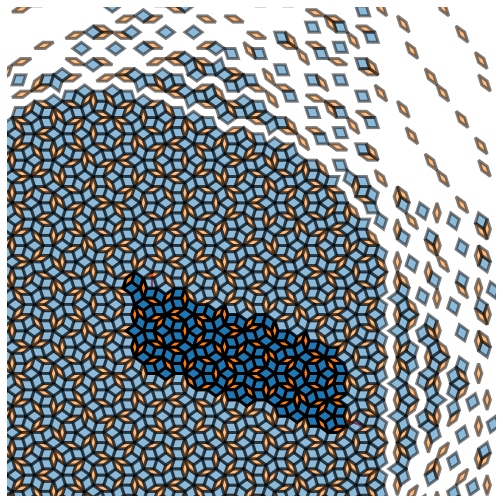

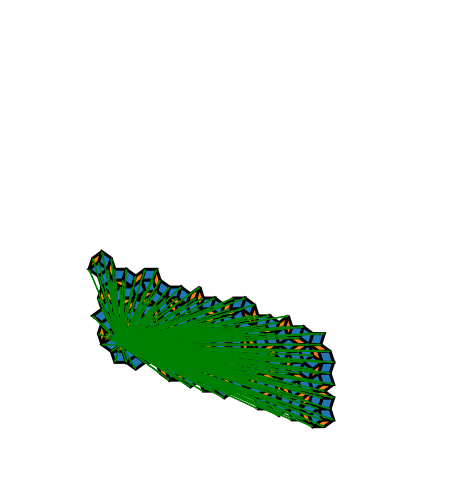

In [8]:
gammas = np.random.rand(4)-0.5
# gammas = np.array([0, 0, 0, 0])
gammas = np.hstack((gammas, -np.sum(gammas) ))
# Sum of gammas must equal zero to return a Penrose tiling. If the sum is not equal to zero one gets a generalized Penrose tiling.

test = Pentagrid_approximant(gammas,n = 1,n2 = 3, config = {"xylim":10, "klim":10, "TOL":10**(-10), "show unit cell": True})
# xylim controls the size of the square.
# klim controls the number of grid lines used to generate the tiling, As a rule of thumb klim must be atleast comparable to xylim or else there will be holes int he tiling.
# TOL is tolerance for precision errors when comparing two quantities for equality.

fig, ax = plt.subplots(figsize = (9,9))
ax.set_axis_off()

test.draw_supercell_vectors()
test.draw_rhombs()

fig, ax = plt.subplots(figsize = (9,9))
ax.set_axis_off()

test.draw_approximant()
test.draw_basis_vectors()
vertices, edges, vectors = test.get_vertex_model()

import pickle
pickle.dump([vertices, edges, vectors],open('PenroseApproximant13.p','wb'))

In [9]:
len(vertices)

235

In [10]:
edges

[[[1.0, 1.0, -0.0, -1.0, -0.0], [2.0, 1.0, -0.0, -1.0, -0.0]],
 [[2.0, 1.0, -0.0, -1.0, -0.0], [2.0, 2.0, -0.0, -1.0, -0.0]],
 [[2.0, 2.0, -0.0, -1.0, -0.0], [1.0, 2.0, -0.0, -1.0, -0.0]],
 [[1.0, 2.0, -0.0, -1.0, -0.0], [1.0, 1.0, -0.0, -1.0, -0.0]],
 [[1.0, 2.0, 1.0, -1.0, -1.0], [2.0, 2.0, 1.0, -1.0, -1.0]],
 [[2.0, 2.0, 1.0, -1.0, -1.0], [2.0, 3.0, 1.0, -1.0, -1.0]],
 [[2.0, 3.0, 1.0, -1.0, -1.0], [1.0, 3.0, 1.0, -1.0, -1.0]],
 [[1.0, 3.0, 1.0, -1.0, -1.0], [1.0, 2.0, 1.0, -1.0, -1.0]],
 [[1.0, 3.0, 2.0, -2.0, -2.0], [2.0, 3.0, 2.0, -2.0, -2.0]],
 [[2.0, 3.0, 2.0, -2.0, -2.0], [2.0, 4.0, 2.0, -2.0, -2.0]],
 [[2.0, 4.0, 2.0, -2.0, -2.0], [1.0, 4.0, 2.0, -2.0, -2.0]],
 [[1.0, 4.0, 2.0, -2.0, -2.0], [1.0, 3.0, 2.0, -2.0, -2.0]],
 [[2.0, 1.0, -1.0, -1.0, -0.0], [3.0, 1.0, -1.0, -1.0, -0.0]],
 [[3.0, 1.0, -1.0, -1.0, -0.0], [3.0, 2.0, -1.0, -1.0, -0.0]],
 [[3.0, 2.0, -1.0, -1.0, -0.0], [2.0, 2.0, -1.0, -1.0, -0.0]],
 [[2.0, 2.0, -1.0, -1.0, -0.0], [2.0, 1.0, -1.0, -1.0, -0.0]],
 [[2.0, 

In [11]:
vectors

[array([1., 0.]),
 array([0.30901699, 0.95105652]),
 array([-0.80901699,  0.58778525]),
 array([-0.80901699, -0.58778525]),
 array([ 0.30901699, -0.95105652])]

## Set tight binding Hamiltonian

In [12]:
import kwant

In [13]:
class PenroseVertexSite(kwant.builder.SimpleSiteFamily):    
    def __init__(self, tiling_vectors):
        self.tiling_vectors = tiling_vectors
        super().__init__()
    
    def pos(self, tag):
        return np.sum([tag[i]*self.tiling_vectors[i] for i in range(5)], axis = 0)

In [14]:
class Penrose_Vertex_Model:
    
    def __init__(self,vertices, edges, vectors):
        self.vertices, self.edges, self.vectors = vertices, edges, vectors
        self.make_syst()
    
    def make_syst(self):
        SiteFamily = PenroseVertexSite(self.vectors)
        self.syst = kwant.Builder()
        self.syst[(SiteFamily(*tuple(vertex)) for vertex in self.vertices)] = 0
        self.syst[(
        (SiteFamily(*tuple(edge[0])),SiteFamily(*tuple(edge[1])))
        for edge in self.edges)] = -1
#         self.syst = self.syst.finalized()
        
    def solve(self):
        self.evals, self.evecs = np.linalg.eigh(self.syst.hamiltonian_submatrix())
        return self.evals, self.evecs
    

In [20]:
PenroseTB = Penrose_Vertex_Model(vertices, edges, vectors)
evals, evecs = PenroseTB.solve()
plt.plot(evals)

fig, axes = plt.subplots(3,3, figsize = (8,8))

for i in range(9):
    ax = axes[i//3, i%3]
    wf = np.abs(evecs[:,i])**2
    kwant.plotter.map(PenroseTB.syst, wf, ax = ax, )
    ax.annotate("i = {}".format(i), (0.7, 0.9),xycoords = "axes fraction")
fig.suptitle("$|\\psi|^2$ of  the nine lowest energy states")

TypeError: You need a finalized system; use Builder.finalized() first.

In [ ]:
[site for site in hopping]

In [ ]:
[hopping for hopping in PenroseTB.syst.hopping_value_pairs()]

## Spectrum as a function of gamma

In [16]:
np.random.seed(0)
gammasOG = np.random.rand(4)-0.5
res = 20

evals_collection = []
evecs_collection = []

for i in range(res):
    delta = i/res
    gammas = list(gammasOG)
    gammas[2] -=delta
    gammas[3] +=delta
    gammas = np.hstack((gammas, -np.sum(gammas) ))

    approximant = Pentagrid_approximant(gammas,n = 2, config = {"xylim":10, "klim":10, "TOL":10**(-10), "show unit cell": True})
    vertices, edges, vectors = approximant.get_vertex_model()
    
    PenroseTB = Penrose_Vertex_Model(vertices, edges, vectors)
    evals, evecs = PenroseTB.solve()
    evals_collection.append(evals)
    evecs_collection.append(evals)

TypeError: You need a finalized system; use Builder.finalized() first.

In [17]:
for evals in evals_collection:
    print(len(evals))

## Test phason flips

(123, 76, 1.618421052631579)
(123, 76, 1.618421052631579)


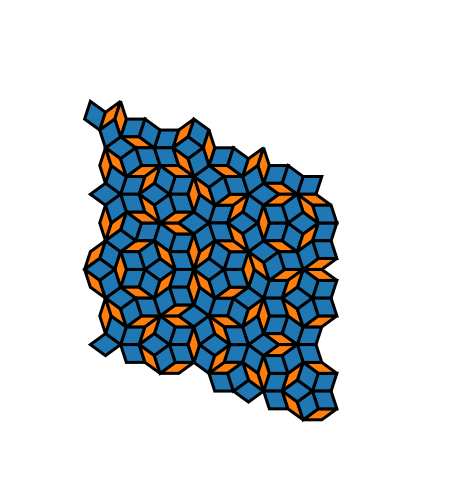

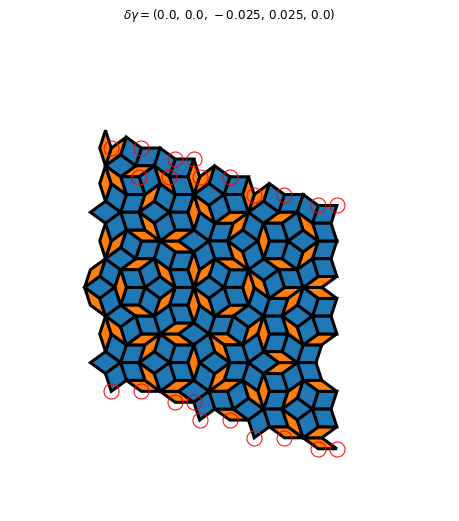

In [18]:
np.random.seed(0)
gammas = np.random.rand(4)-0.5
gammas = np.hstack((gammas, -np.sum(gammas) ))

test1 = Pentagrid_approximant(gammas,n = 2, config = {"xylim":10, "klim":10, "TOL":10**(-10), "show unit cell": True})

fig, ax = plt.subplots(figsize = (9,9))
ax.set_axis_off()
test1.draw_approximant()
vertices, edges, vectors = test1.get_vertex_model()

np.random.seed(0)
gammas = np.random.rand(4)-0.5
gammas = np.hstack((gammas, -np.sum(gammas) ))
delta_gammas = 0.025*np.array([0,0,-1,1,0])
gammas += delta_gammas

test2 = Pentagrid_approximant(gammas,n = 2, config = {"xylim":10, "klim":10, "TOL":10**(-10), "show unit cell": True})

fig, ax = plt.subplots(figsize = (9,9))
ax.set_axis_off()
test2.draw_approximant()
vertices2, edges2, vectors2 = test2.get_vertex_model()

ax.set_title("$\\delta \\gamma = ({},\,{},\,{},\,{},\,{})$".format(*[gamma for gamma in delta_gammas]))

for vertex in vertices2:
    if vertex not in vertices:
        xy = test.Ktoxy(vertex)
        ax.plot(*xy, "ro", markersize = 15, fillstyle = "none", lw = 5)

/var/folders/rd/7csxd3cn4mqf7l6b615b5mr80000gp/T/ipykernel_53687/4183134621.py:19: RuntimeWarning: The plotted data contains 1.28% of values overflowing upper limit 0.0209818 
  kwant.plotter.map(fsyst, wf, ax = ax, )
/var/folders/rd/7csxd3cn4mqf7l6b615b5mr80000gp/T/ipykernel_53687/4183134621.py:19: RuntimeWarning: The plotted data contains 1.39% of values overflowing upper limit 0.021218 
  kwant.plotter.map(fsyst, wf, ax = ax, )
/var/folders/rd/7csxd3cn4mqf7l6b615b5mr80000gp/T/ipykernel_53687/4183134621.py:19: RuntimeWarning: The plotted data contains 0.87% of values overflowing upper limit 0.0247593 
  kwant.plotter.map(fsyst, wf, ax = ax, )
/var/folders/rd/7csxd3cn4mqf7l6b615b5mr80000gp/T/ipykernel_53687/4183134621.py:19: RuntimeWarning: The plotted data contains 1.86% of values overflowing upper limit 0.0226244 
  kwant.plotter.map(fsyst, wf, ax = ax, )
/var/folders/rd/7csxd3cn4mqf7l6b615b5mr80000gp/T/ipykernel_53687/4183134621.py:19: RuntimeWarning: The plotted data contains 0.85

Text(0.5, 0.98, '$|\\psi|^2$ of  the nine lowest energy states')

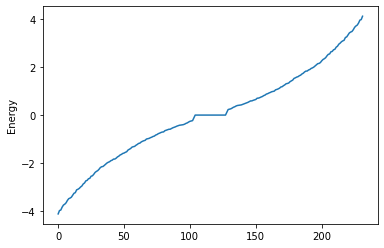

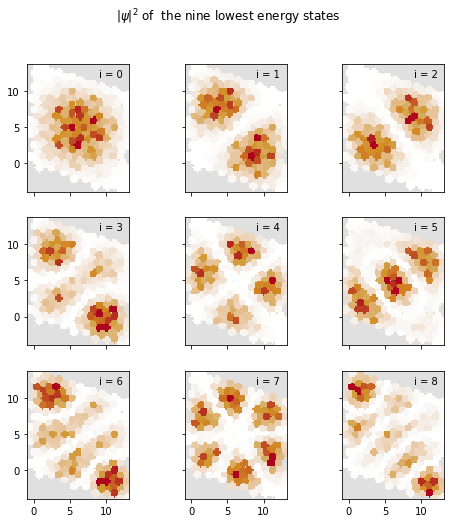

In [19]:
SiteFamily = PenroseVertexSite(vectors2)
syst = kwant.Builder()
syst[(SiteFamily(*tuple(vertex)) for vertex in vertices2)] = 0
syst[(
(SiteFamily(*tuple(edge[0])), SiteFamily(*tuple(edge[1])))
for edge in edges2)] = -1

fsyst = syst.finalized()
evals, evecs = np.linalg.eigh(fsyst.hamiltonian_submatrix())

plt.plot(evals)
plt.ylabel("Energy")

fig, axes = plt.subplots(3,3, sharex = 'col', sharey = 'row', figsize = (8,8))

for i in range(9):
    ax = axes[i//3, i%3]
    wf = np.abs(evecs[:,i])**2
    kwant.plotter.map(fsyst, wf, ax = ax, )
    ax.annotate("i = {}".format(i), (0.7, 0.9),xycoords = "axes fraction")
fig.suptitle("$|\\psi|^2$ of  the nine lowest energy states")